In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from pathlib import Path

In [3]:
# Set display options for better visualization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [11]:
# Define the path to the CSV files
base_path = Path('../../data/raw')

# List all CSV files in the directory
df1 = pd.read_csv(base_path / 'optitrack_data_calibration_x.csv')
df2 = pd.read_csv(base_path / 'optitrack_data_calibration_y.csv')


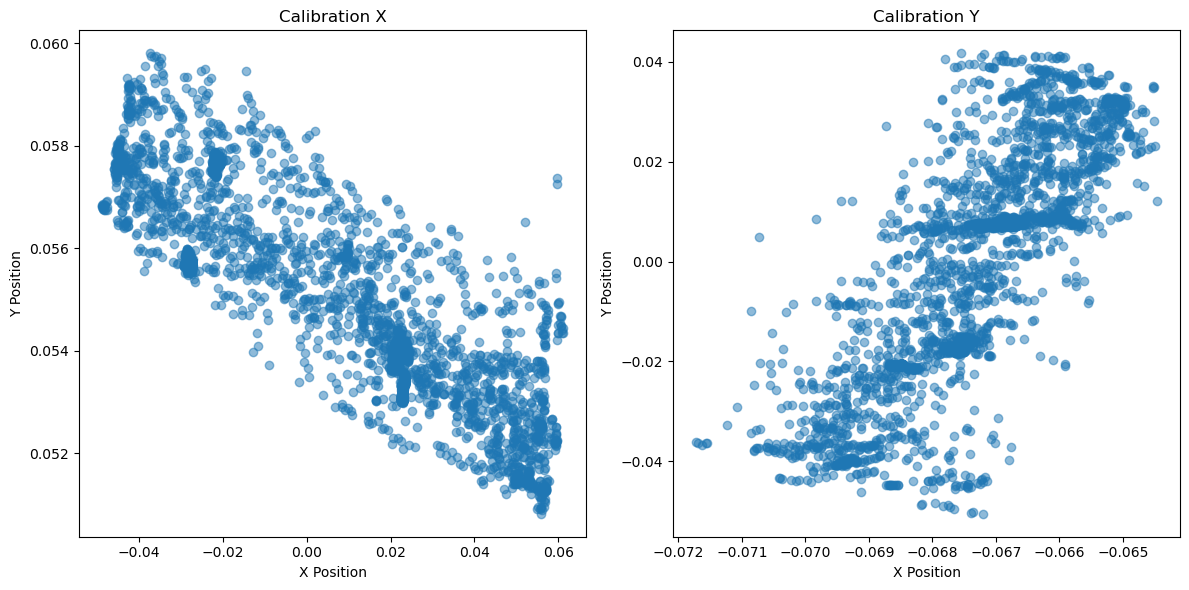

In [13]:
# Create a simple visualization
plt.figure(figsize=(12, 6))

# Plot Dataset 1
plt.subplot(121)
plt.scatter(df1['x'], df1['y'], alpha=0.5)
plt.title('Calibration X')
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Plot Dataset 2
plt.subplot(122)
plt.scatter(df2['x'], df2['y'], alpha=0.5)
plt.title('Calibration Y')
plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.tight_layout()
plt.show()

In [14]:
# Perform linear regression for dataset 1
X1 = df1['x'].values.reshape(-1, 1)
y1 = df1['y'].values
reg1 = LinearRegression().fit(X1, y1)
slope1 = reg1.coef_[0]
intercept1 = reg1.intercept_

# Perform linear regression for dataset 2
X2 = df2['x'].values.reshape(-1, 1)
y2 = df2['y'].values
reg2 = LinearRegression().fit(X2, y2)
slope2 = reg2.coef_[0]
intercept2 = reg2.intercept_

In [15]:
# Print regression equations
print("Line 1 equation: y = {:.4f}x + {:.4f}".format(slope1, intercept1))
print("Line 2 equation: y = {:.4f}x + {:.4f}".format(slope2, intercept2))
# Calculate R-squared scores
r2_score1 = reg1.score(X1, y1)
r2_score2 = reg2.score(X2, y2)
print("\nR-squared scores:")
print(f"Line 1: {r2_score1:.4f}")
print(f"Line 2: {r2_score2:.4f}")

Line 1 equation: y = -0.0524x + 0.0550
Line 2 equation: y = 14.6664x + 0.9863

R-squared scores:
Line 1: 0.7108
Line 2: 0.7078


In [16]:
# Find intersection point
# Solve: slope1 * x + intercept1 = slope2 * x + intercept2
x_intersection = (intercept2 - intercept1) / (slope1 - slope2)
y_intersection = slope1 * x_intersection + intercept1

print("\nIntersection point:")
print(f"x = {x_intersection:.4f}")
print(f"y = {y_intersection:.4f}")


Intersection point:
x = -0.0633
y = 0.0583
